In [1]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [13]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ stringr   1.5.0
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
#########生成IRI矩阵
#首先分析GABA
IRI_dat_08 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW08/GABAergic_neurons/result_1_1.csv")
IRI_dat_08$uni_feature <- paste0(IRI_dat_08$Gene,"_",IRI_dat_08$rank)
IRI_dat_12 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW12/GABAergic_neurons/result_1_1.csv")
IRI_dat_12$uni_feature <- paste0(IRI_dat_12$Gene,"_",IRI_dat_12$rank)
IRI_dat_16_1_3 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW16_1_3/GABAergic_neurons/result_1_1.csv")
IRI_dat_16_1_3$uni_feature <- paste0(IRI_dat_16_1_3$Gene,"_",IRI_dat_16_1_3$rank)
IRI_dat_16_1_4 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW16_1_4/GABAergic_neurons/result_1_1.csv")
IRI_dat_16_1_4$uni_feature <- paste0(IRI_dat_16_1_4$Gene,"_",IRI_dat_16_1_4$rank)
IRI_dat_16_1_9 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW16_1_9/GABAergic_neurons/result_1_1.csv")
IRI_dat_16_1_9$uni_feature <- paste0(IRI_dat_16_1_9$Gene,"_",IRI_dat_16_1_9$rank)
IRI_dat_19_1_1 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW19_1_1/GABAergic_neurons/result_1_1.csv")
IRI_dat_19_1_1$uni_feature <- paste0(IRI_dat_19_1_1$Gene,"_",IRI_dat_19_1_1$rank)
IRI_dat_19_1_2 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW19_1_2/GABAergic_neurons/result_1_1.csv")
IRI_dat_19_1_2$uni_feature <- paste0(IRI_dat_19_1_2$Gene,"_",IRI_dat_19_1_2$rank)
IRI_dat_19_1_3 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW19_1_3/GABAergic_neurons/result_1_1.csv")
IRI_dat_19_1_3$uni_feature <- paste0(IRI_dat_19_1_3$Gene,"_",IRI_dat_19_1_3$rank)
IRI_dat_23_1_1 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW23_1_1/GABAergic_neurons/result_1_1.csv")
IRI_dat_23_1_1$uni_feature <- paste0(IRI_dat_23_1_1$Gene,"_",IRI_dat_23_1_1$rank)
IRI_dat_23_1_2 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW23_1_2/GABAergic_neurons/result_1_1.csv")
IRI_dat_23_1_2$uni_feature <- paste0(IRI_dat_23_1_2$Gene,"_",IRI_dat_23_1_2$rank)
IRI_dat_23_1_3 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW23_1_3/GABAergic_neurons/result_1_1.csv")
IRI_dat_23_1_3$uni_feature <- paste0(IRI_dat_23_1_3$Gene,"_",IRI_dat_23_1_3$rank)
IRI_dat_26_1_1 <- read.csv("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW26_1_1/GABAergic_neurons/result_1_1.csv")
IRI_dat_26_1_1$uni_feature <- paste0(IRI_dat_26_1_1$Gene,"_",IRI_dat_26_1_1$rank)


In [35]:
df <- rbind(IRI_dat_08[,c('position','uni_feature','iri')],IRI_dat_12[,c('position','uni_feature','iri')],
                IRI_dat_16_1_3[,c('position','uni_feature','iri')],IRI_dat_16_1_4[,c('position','uni_feature','iri')],IRI_dat_16_1_9[,c('position','uni_feature','iri')],
                IRI_dat_19_1_1[,c('position','uni_feature','iri')],IRI_dat_19_1_2[,c('position','uni_feature','iri')],IRI_dat_19_1_3[,c('position','uni_feature','iri')],
                IRI_dat_23_1_1[,c('position','uni_feature','iri')],IRI_dat_23_1_2[,c('position','uni_feature','iri')],IRI_dat_23_1_3[,c('position','uni_feature','iri')],
                IRI_dat_26_1_1[,c('position','uni_feature','iri')])

In [36]:
df$sample <- c(rep('GW08',nrow(IRI_dat_08)),rep('GW12',nrow(IRI_dat_12)),rep('GW16_1_3',nrow(IRI_dat_16_1_3)),
                    rep('GW16_1_4',nrow(IRI_dat_16_1_4)),rep('GW16_1_9',nrow(IRI_dat_16_1_9)),rep('GW19_1_1',nrow(IRI_dat_19_1_1)),
                    rep('GW19_1_2',nrow(IRI_dat_19_1_2)),rep('GW19_1_3',nrow(IRI_dat_19_1_3)),rep('GW23_1_1',nrow(IRI_dat_23_1_1)),
                    rep('GW23_1_2',nrow(IRI_dat_23_1_2)),rep('GW23_1_3',nrow(IRI_dat_23_1_3)),rep('GW26_1_1',nrow(IRI_dat_26_1_1)))

In [37]:
head(df)

,position,uni_feature,iri,sample
,<chr>,<chr>,<dbl>,<chr>
1,chr19:18701743-18702917:+,chr19/REX1BD/+/1_8,0.20936259,GW08
2,chr8:32600770-32607078:+,chr8/NRG1/+/1_14,Inf,GW08
3,chr8:32607102-32611889:+,chr8/NRG1/+/1_15,Inf,GW08
4,chr13:101144072-101167680:+,chr13/PCCA/+/1_39,0.02362897,GW08
5,chr6:108544249-108581963:-,chr6/SNX3/-/1_4,Inf,GW08
6,chr16:28164106-28167394:-,chr16/XPO6/-/1_34,Inf,GW08


In [39]:
write.table(df,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/all_inron_iri.txt",sep='\t',quote=F,col.names=F,row.names=F)

In [21]:
# 使用pivot_wider函数进行转换
wide_df <- pivot_wider(df, names_from = "sample", values_from = "iri")
head(wide_df)
dim(wide_df)


uni_feature,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19/REX1BD/+/1_8,0.20936259,NA,NA,NA,0.003963854,0.005443476,NA,NA,0.005665363,NA,NA,0.02332297
chr8/NRG1/+/1_14,Inf,Inf,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr8/NRG1/+/1_15,Inf,NA,NA,NA,Inf,NA,NA,NA,NA,NA,NA,NA
chr13/PCCA/+/1_39,0.02362897,NA,NA,NA,NA,0.026431718,NA,NA,Inf,NA,NA,NA
chr6/SNX3/-/1_4,Inf,NA,NA,0.03040427,0.052627264,NA,NA,NA,NA,NA,0.005363512,0.01528870
chr16/XPO6/-/1_34,Inf,Inf,Inf,NA,Inf,NA,NA,Inf,NA,Inf,Inf,Inf


[1] 74426    13

In [22]:
data <- as.data.frame(wide_df)
rownames(data) <- data$uni_feature
data <- data[,-1]
head(data)


,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19/REX1BD/+/1_8,0.20936259,NA,NA,NA,0.003963854,0.005443476,NA,NA,0.005665363,NA,NA,0.02332297
chr8/NRG1/+/1_14,Inf,Inf,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr8/NRG1/+/1_15,Inf,NA,NA,NA,Inf,NA,NA,NA,NA,NA,NA,NA
chr13/PCCA/+/1_39,0.02362897,NA,NA,NA,NA,0.026431718,NA,NA,Inf,NA,NA,NA
chr6/SNX3/-/1_4,Inf,NA,NA,0.03040427,0.052627264,NA,NA,NA,NA,NA,0.005363512,0.01528870
chr16/XPO6/-/1_34,Inf,Inf,Inf,NA,Inf,NA,NA,Inf,NA,Inf,Inf,Inf


In [23]:
data[is.na(data)] <- 0
data[data==Inf] <- 0

# 查看转换后的数据框
head(data)

,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19/REX1BD/+/1_8,0.20936259,0,0,0.00000000,0.003963854,0.005443476,0,0,0.005665363,0,0.000000000,0.02332297
chr8/NRG1/+/1_14,0.00000000,0,0,0.00000000,0.000000000,0.000000000,0,0,0.000000000,0,0.000000000,0.00000000
chr8/NRG1/+/1_15,0.00000000,0,0,0.00000000,0.000000000,0.000000000,0,0,0.000000000,0,0.000000000,0.00000000
chr13/PCCA/+/1_39,0.02362897,0,0,0.00000000,0.000000000,0.026431718,0,0,0.000000000,0,0.000000000,0.00000000
chr6/SNX3/-/1_4,0.00000000,0,0,0.03040427,0.052627264,0.000000000,0,0,0.000000000,0,0.005363512,0.01528870
chr16/XPO6/-/1_34,0.00000000,0,0,0.00000000,0.000000000,0.000000000,0,0,0.000000000,0,0.000000000,0.00000000


In [24]:
data <- data[rowSums(data)!=0,]
dim(data)

[1] 26219    12

In [32]:
length(IRI_dat_08$Gene[which(IRI_dat_08$iri!=Inf)])
genes <- IRI_dat_08$Gene[which(IRI_dat_08$iri!=Inf)]
write.table(genes,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/GW08/GABAergic_neurons/genes_iri_notInf_1_1.txt",row.names=F,col.names=F,quote=F)

[1] 728

In [33]:
head(IRI_dat_08)

,Gene,feature,rank,position,length,read_counts,read_counts_norm,coverage...,position.exon_left,length.exon_left,⋯,read_counts_norm.exon_left,coverage....exon_left,position.exon_right,length.exon_right,read_counts.exon_right,read_counts_norm.exon_right,coverage....exon_right,expr_state,iri,uni_feature
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,chr19/REX1BD/+/1,intron,8,chr19:18701743-18702917:+,1174,143,121.8057922,42.844974,chr19:18701663-18701743:+,80,⋯,737.50000,100,chr19:18702917-18703147:+,230,98,426.0870,100,low expression,0.20936259,chr19/REX1BD/+/1_8
2,chr8/NRG1/+/1,intron,14,chr8:32600770-32607078:+,6308,2,0.3170577,4.153456,chr8:32585466-32585596:+,130,⋯,0.00000,0,chr8:32611889-32611992:+,103,0,0.0000,0,low expression,Inf,chr8/NRG1/+/1_14
3,chr8/NRG1/+/1,intron,15,chr8:32607102-32611889:+,4787,1,0.2088991,3.133487,chr8:32585466-32585596:+,130,⋯,0.00000,0,chr8:32611889-32611992:+,103,0,0.0000,0,low expression,Inf,chr8/NRG1/+/1_15
4,chr13/PCCA/+/1,intron,39,chr13:101144072-101167680:+,23608,70,2.9650966,1.567265,chr13:101077886-101077985:+,99,⋯,20.20202,100,chr13:101179928-101180006:+,78,18,230.7692,100,ok,0.02362897,chr13/PCCA/+/1_39
5,chr6/SNX3/-/1,intron,4,chr6:108544249-108581963:-,37714,38,1.0075834,1.370844,chr6:108532426-108533458:-,1032,⋯,0.00000,0,chr6:108582029-108582244:-,215,0,0.0000,0,low expression,Inf,chr6/SNX3/-/1_4
6,chr16/XPO6/-/1,intron,34,chr16:28164106-28167394:-,3288,1,0.3041363,4.045012,chr16:28163979-28164106:-,127,⋯,0.00000,0,chr16:28167394-28167848:-,454,0,0.0000,0,low expression,Inf,chr16/XPO6/-/1_34


In [124]:
###与exd100的intron region有交集的res结果
res_cluster1 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/intron_exd100_region_with_de_edited_sites_cluster1.txt")
res_cluster1[,11] <- paste0(res_cluster1[,1],"_",res_cluster1[,9])
#####将第八周定为发育早期，第26周定为发育晚期
#第8周的intron region和26周的intron region做交集，并对iri做log2比较？？
intron_region_08_cluster1 <- res_cluster1[,4][which(res_cluster1[,6]=="GW08")]
intron_region_26_cluster1 <- res_cluster1[,4][which(res_cluster1[,6]=="GW26_1_1")]

shared_intron_cluster1 <- intersect(intron_region_08_cluster1,intron_region_26_cluster1)
all_rows_cluster1 <- data.frame()
for(one in shared_intron_cluster1){
    iri_08 <- unique(res_cluster1[,5][which(res_cluster1[,4]==one & res_cluster1[,6]=='GW08')])
    iri_26 <- unique(res_cluster1[,5][which(res_cluster1[,4]==one & res_cluster1[,6]=='GW26_1_1')])
    
    this_row <- c(iri_08,iri_26,one)
    all_rows_cluster1 <- rbind(all_rows_cluster1,this_row)
}
rownames(all_rows_cluster1) <- all_rows_cluster1[,3]
all_rows_cluster1 <- all_rows_cluster1[,-3]
colnames(all_rows_cluster1) <- c('iri_early','iri_late')
all_rows_cluster1$log2_iri_fc_change <- log2(as.numeric(all_rows_cluster1$iri_late)/as.numeric(all_rows_cluster1$iri_early))

sub_dat_cluster1 <- all_rows_cluster1$log2_iri_fc_change[!is.na(all_rows_cluster1$log2_iri_fc_change)]
sub_dat_cluster1 <- sub_dat_cluster1[sub_dat_cluster1!=-Inf]
sub_dat_cluster1 <- sub_dat_cluster1[sub_dat_cluster1!=Inf]

In [127]:
###与exd100的intron region有交集的res结果
res_cluster2 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/intron_exd100_region_with_de_edited_sites_cluster2.txt")
res_cluster2[,11] <- paste0(res_cluster2[,1],"_",res_cluster2[,9])
#####将第八周定为发育早期，第26周定为发育晚期
#第8周的intron region和26周的intron region做交集，并对iri做log2比较？？
intron_region_08_cluster2 <- res_cluster2[,4][which(res_cluster2[,6]=="GW08")]
intron_region_26_cluster2 <- res_cluster2[,4][which(res_cluster2[,6]=="GW26_1_1")]

shared_intron_cluster2 <- intersect(intron_region_08_cluster2,intron_region_26_cluster2)
all_rows_cluster2 <- data.frame()
for(one in shared_intron_cluster2){
    iri_08 <- unique(res_cluster2[,5][which(res_cluster2[,4]==one & res_cluster2[,6]=='GW08')])
    iri_26 <- unique(res_cluster2[,5][which(res_cluster2[,4]==one & res_cluster2[,6]=='GW26_1_1')])
    
    this_row <- c(iri_08,iri_26,one)
    all_rows_cluster2 <- rbind(all_rows_cluster2,this_row)
}
rownames(all_rows_cluster2) <- all_rows_cluster2[,3]
all_rows_cluster2 <- all_rows_cluster2[,-3]
colnames(all_rows_cluster2) <- c('iri_early','iri_late')
all_rows_cluster2$log2_iri_fc_change <- log2(as.numeric(all_rows_cluster2$iri_late)/as.numeric(all_rows_cluster2$iri_early))

sub_dat_cluster2 <- all_rows_cluster2$log2_iri_fc_change[!is.na(all_rows_cluster2$log2_iri_fc_change)]
sub_dat_cluster2 <- sub_dat_cluster2[sub_dat_cluster2!=-Inf]
sub_dat_cluster2 <- sub_dat_cluster2[sub_dat_cluster2!=Inf]

In [130]:
###与exd100的intron region有交集的res结果
res_cluster3 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/intron_retention_analysis_senescence-master/intron_exd100_region_with_de_edited_sites_cluster3.txt")
res_cluster3[,11] <- paste0(res_cluster3[,1],"_",res_cluster3[,9])
#####将第八周定为发育早期，第26周定为发育晚期
#第8周的intron region和26周的intron region做交集，并对iri做log2比较？？
intron_region_08_cluster3 <- res_cluster3[,4][which(res_cluster3[,6]=="GW08")]
intron_region_26_cluster3 <- res_cluster3[,4][which(res_cluster3[,6]=="GW26_1_1")]

shared_intron_cluster3 <- intersect(intron_region_08_cluster3,intron_region_26_cluster3)
all_rows_cluster3 <- data.frame()
for(one in shared_intron_cluster3){
    iri_08 <- unique(res_cluster3[,5][which(res_cluster3[,4]==one & res_cluster3[,6]=='GW08')])
    iri_26 <- unique(res_cluster3[,5][which(res_cluster3[,4]==one & res_cluster3[,6]=='GW26_1_1')])
    
    this_row <- c(iri_08,iri_26,one)
    all_rows_cluster3 <- rbind(all_rows_cluster3,this_row)
}
rownames(all_rows_cluster3) <- all_rows_cluster3[,3]
all_rows_cluster3 <- all_rows_cluster3[,-3]
colnames(all_rows_cluster3) <- c('iri_early','iri_late')
all_rows_cluster3$log2_iri_fc_change <- log2(as.numeric(all_rows_cluster3$iri_late)/as.numeric(all_rows_cluster3$iri_early))

sub_dat_cluster3 <- all_rows_cluster3$log2_iri_fc_change[!is.na(all_rows_cluster3$log2_iri_fc_change)]
sub_dat_cluster3 <- sub_dat_cluster3[sub_dat_cluster3!=-Inf]
sub_dat_cluster3 <- sub_dat_cluster3[sub_dat_cluster3!=Inf]

In [131]:
sub_dat_cluster3
sub_dat_cluster2
sub_dat_cluster1

[1]  7.135850 -6.645049 -7.232333  3.759350

[1] -4.518131  7.135850 -7.129283 -7.067424

[1] -4.518131  7.135850 -6.645049 -7.232333  3.759350

In [133]:
df <- data.frame(
   cluster = rep(c("cluster1", "cluster2", "cluster3"), times = c(5,4,4)),
   value = c(sub_dat_cluster1,sub_dat_cluster2,sub_dat_cluster3)
 )

df

cluster,value
<chr>,<dbl>
cluster1,-4.518131
cluster1,7.135850
cluster1,-6.645049
cluster1,-7.232333
cluster1,3.759350
cluster2,-4.518131
cluster2,7.135850
cluster2,-7.129283
cluster2,-7.067424


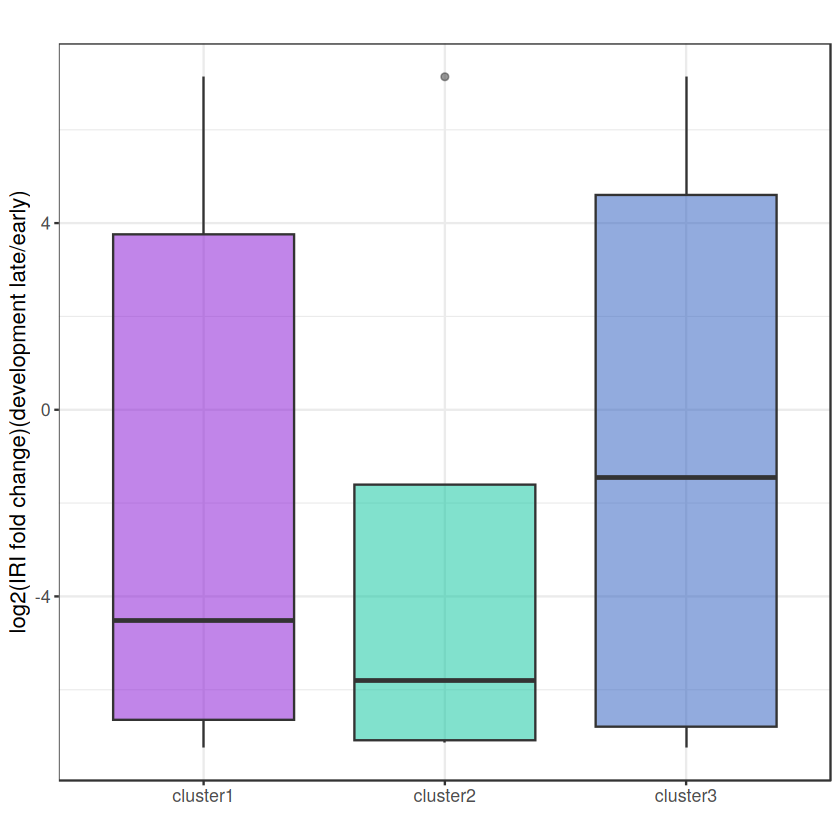

In [156]:

# 使用ggplot2生成箱线图
ggplot(df, aes(x = cluster, y = value, fill = cluster)) +
  geom_boxplot(alpha=0.5) +
  scale_fill_manual(values = c("#840dd3", "#04c49c", "#2759bd")) + # 自定义颜色
  labs(title = "",
       x = "",
       y = "log2(IRI fold change)(development late/early)") +
  #ylim(-20,20)+
  theme_bw() + # 使用白色背景主题
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank(),
        text = element_text(size = 13),legend.position = "none") 
